In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
data_daily = pd.read_csv('Data/data_daily_weather.csv')

In [3]:
data_daily.head(3)

,Unnamed: 0,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,EXITS,PREV_EXITS,SALDO_ENTRIES,SALDO_EXITS,TRANSITING,PRCP
0,0,A002,R051,02-00-00,59 ST,2016-06-27,5714706,06/26/2016,5714130.0,1938907,1938649.0,576.0,258.0,834.0,0.45
1,1,A002,R051,02-00-01,59 ST,2016-06-27,5258231,06/26/2016,5257426.0,1153431,1153236.0,805.0,195.0,1000.0,0.45
2,2,A002,R051,02-03-00,59 ST,2016-06-27,724086,06/26/2016,723741.0,2733057,2731725.0,345.0,1332.0,1677.0,0.45


In [4]:
data_daily = data_daily[data_daily['SALDO_ENTRIES']<10000]

In [5]:
df = data_daily[['DATE','SALDO_ENTRIES','PRCP']]
df.head(3)

,DATE,SALDO_ENTRIES,PRCP
0,2016-06-27,576.0,0.45
1,2016-06-27,805.0,0.45
2,2016-06-27,345.0,0.45


In [6]:
df = pd.concat([(df.groupby(by = 'DATE')['SALDO_ENTRIES'].sum()),\
                (df.groupby(by = 'DATE')['PRCP'].mean())],axis=1)
df.head(3)

,SALDO_ENTRIES,PRCP
DATE,,
2016-06-27,2920263.0,0.45
2016-06-28,5482024.0,0.12
2016-06-29,5597650.0,0.01


## 2.1 Plotting the data

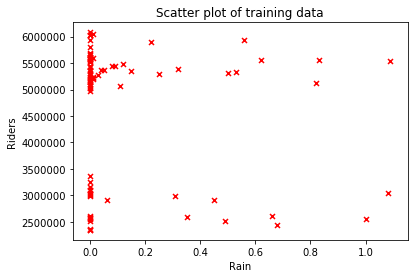

In [7]:
plt.scatter(df['PRCP'], df['SALDO_ENTRIES'], marker='x',color='red',s = 25)
plt.xlabel('Rain') 
plt.ylabel('Riders')
plt.title('Scatter plot of training data')

## 2.2 Gradient Descent

In [8]:
df.insert(0, 'Ones',1)
X = df.iloc[:,0:2]
y = df.iloc[:,2:3]
X =np.matrix(X.values)
y= np.matrix(y.values)
m = len(df)
alpha = 0.00001
iterations = 5
theta = np.matrix(np.array([0,0]))
X.shape,theta.shape,y.shape

((89, 2), (1, 2), (89, 1))

In [9]:
def computeCost(X, y, theta):
    term = np.power(((X * theta.T)-y),2)
    return np.sum(term) / (2*m)
computeCost(X,y,theta)

0.043762921348313777

In [10]:
def gradient(X, y, theta, alpha, iterations):
    theta_temp = np.matrix(np.zeros(theta.shape))
    theta_trail = np.zeros((383588, 2))
    cost = np.zeros(iterations)
    m = float(X.shape[0])
    
    for i in range(iterations):
        error = (X * theta.T) - y
        
        for j in range(theta.shape[1]):
            func = np.multiply(error, X[:,j])
            theta_temp[0,j] = theta[0,j] - ((alpha / m) * np.sum(func))
            
        theta_trail[i,:] = theta
        cost[i]=computeCost(X,y,theta)
        theta = theta_temp
    return theta, theta_trail, cost

theta, theta_trail, cost = gradient(X, y, theta, alpha, iterations)

In [11]:
cost

array([  4.37629213e-02,   1.88772508e+31,   1.01134788e+48,
         5.41829183e+64,   2.90284747e+81])

In [12]:
theta

matrix([[  3.17671270e+27,   1.58375008e+34]])

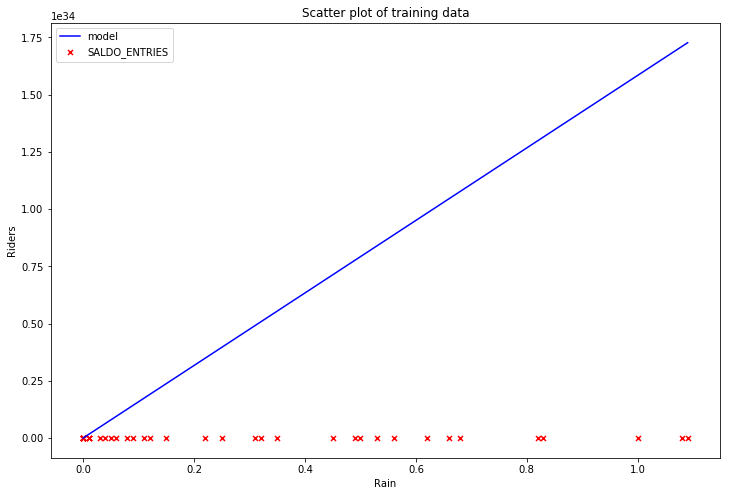

In [13]:
x = np.linspace(df['PRCP'].min(), df['PRCP'].max(),100)
f = theta[0,0]*1 + (theta[0,1]*x)
fig,ax = plt.subplots(figsize=(12,8))
plt.scatter(df['PRCP'], df['SALDO_ENTRIES'], marker='x',color='red',s = 25)
ax.plot(x,f,'b', label= 'model')
plt.xlabel('Rain') 
plt.ylabel('Riders')
plt.title('Scatter plot of training data')
ax.legend()
#plt.ylim(-0.5,10000)
#plt.xlim(0,1)